# Fitting Scaling Relationships with ScaleRPy

Created by Bryanne McDonough 12/3/24

In [8]:
%load_ext autoreload
%autoreload 2

import SpatGalDat #update to package
import numpy as np
import fit_funcs as fit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
spax = np.load('C:/Users/br.mcdonough/Documents/Projects/ScaleRPy/flatstack.npy')
print(spax.shape)
print(max(spax[3,:]))

(5, 12815387)
3.0


In [10]:
#Create a SpatGalDat object with your spatially-resolved data
ind = spax[3,:]
wh=np.nonzero((ind!=0))
##replace with actual data call for self, for package help doc replace with generic
mass = spax[0,:][wh]
sfr = spax[1,:][wh]
gas = []
sfr[-1] = np.nan
dat = SpatGalDat.SpatGalDat(mass, sfr, gas, scale = 'log')
print(dat.sfr)


[-2.39342146 -2.18347182 -2.94251529 ... -2.05674678 -5.2663414
         nan]


In [11]:
#Identify the default units:
print(dat.s_mass_unit)
print(dat.sfr_unit)
#print(dat.gas_unit)

$M_\odot \mathrm{kpc}^{-2}$
$M_\odot \mathrm{yr}^{-1} \mathrm{kpc}^{-2}$


The default units are in written in latex because they will make up the axis of our formal plots. You can update the units manually.

In [12]:
dat.s_mass_unit = r'$M_\odot \mathrm{kpc}^{-2}$'
print(dat.s_mass_unit)

$M_\odot \mathrm{kpc}^{-2}$


[98.0 136.0 167.0 218.0 216.0 309.0 301.0 402.0 444.0 550.0 720.0 868.0
 1141.0 1511.0 2041.0 2280.0 2010.0 1568.0 1018.0 752.0 271.0 38.0 4.0 1.0
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[ 0.65462706 -6.60887672]


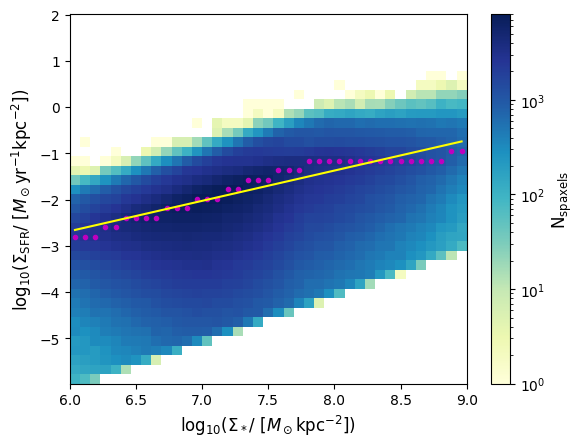

In [ ]:
#print(dat.SFMS_params)

#p, perr = fit.fit_single(dat.SFMS_ridgept)
#print(p)
dat.SFMS_ridge( xrange=(6,9))
#how do results depend on number of bins?
#overwriting SFMS_ridge function
#print(ridge)
#left off editing this function to also plot the ridge line
#may want to update the functions used by curvefit to take in one array with the params? 
print(dat.SFMS_params)

[110.0 161.0 197.0 259.0 257.0 345.0 352.0 464.0 542.0 647.0 865.0 1026.0
 1328.0 1769.0 2405.0 2713.0 2357.0 1821.0 1237.0 904.0 346.0 50.0 5.0 1.0
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[0.06776763 0.4655752  0.06274063 0.19150707]


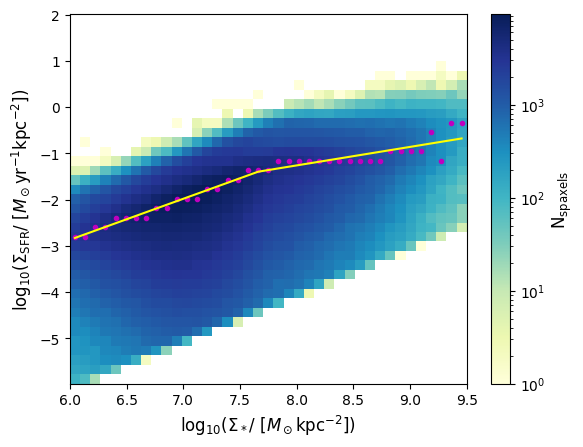

In [ ]:
hist, ax, ridge = dat.SFMS_ridge(xrange=(6,9.5))
#how do results depend on number of bins?

print(ridge)

#In this case, a smaller xrange will fix the overfitting of points based on less data
#But ideally would have errors on the ridge points
#instead of fitting with Gaussian, skew-normal?

[110.0 161.0 197.0 259.0 257.0 345.0 352.0 464.0 542.0 647.0 865.0 1026.0
 1328.0 1769.0 2405.0 2713.0 2357.0 1821.0 1237.0 904.0 346.0 50.0 5.0 1.0
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[0.06776763 0.4655752  0.06274063 0.19150707]


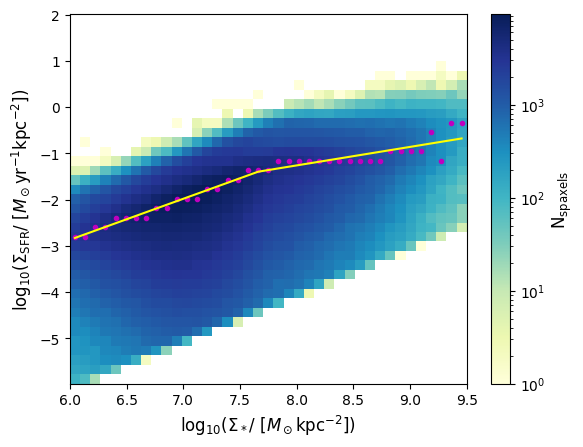

In [ ]:
hist, ax, ridge = dat.SFMS_ridge(xrange=(6,9.5))
#how do results depend on number of bins?
#overwriting SFMS_ridge function
print(ridge)
#left off editing this function to also plot the ridge line
#may want to update the functions used by curvefit to take in one array with the params? 

Next steps: find way to handle quenched spaxels (prefer removing quenched as opposed)
AND have choice to fit histogram columns with a double gaussian